In [155]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt

inward = pd.read_csv('D:/2probe/clean/micro/inward_cut_back.csv')
reverse = pd.read_csv('D:/2probe/clean/micro/reverse_cut_back.csv')

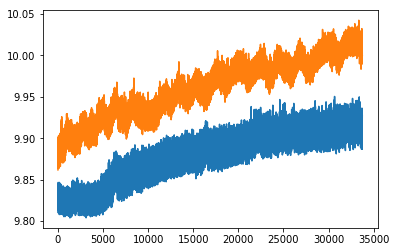

In [156]:
plt.plot(inward['time'],inward['R'])
plt.plot(reverse['time'],reverse['R'])

In [157]:
print(inward.head(5))
print(inward.tail(5))
print(reverse.head(5))
print(reverse.tail(5))

      time        R
0  0.00000  9.84208
1  0.42597  9.84135
2  0.85096  9.84015
3  1.27697  9.83864
4  1.70307  9.83698
              time        R
79165  33729.12916  9.92629
79166  33729.55418  9.92623
79167  33729.97915  9.92680
79168  33730.40528  9.92627
79169  33730.83131  9.92713
      time        R
0  0.00000  9.86172
1  0.42701  9.86199
2  0.85301  9.86220
3  1.27800  9.86425
4  1.70399  9.86468
              time         R
79166  33729.41921  10.00280
79167  33729.84619  10.00169
79168  33730.27220  10.00022
79169  33730.69821   9.99926
79170  33731.12334   9.99949


In [158]:
T=33.731
P1=1000       #cycles in inward data
P2=1000       #cycles in reverese data
accuracy=1.0  #lowest and highest point in every cycle is not a single point
# it is in fact average of several measuremnts during 1.0s, to avoid outlier

In [159]:
def low_high1(inward):
    low=[]
    high=[]
    low_ave=[]
    high_ave=[]
    
    low_start=T/2.0
    high_start=T
    for i in range(P1):
        low.append(inward.loc[(inward['time']>low_start-(accuracy/2.0))&(inward['time']<low_start+(accuracy/2.0)),'R'].mean())
        high.append(inward.loc[(inward['time']>high_start-(accuracy/2.0))&(inward['time']<high_start+(accuracy/2.0)),'R'].mean())
        low_start+=T
        high_start+=T
        if i%50==49:
            low_ave.append(np.average(low[i-49:i+1]))
            high_ave.append(np.average(high[i-49:i+1]))
        
    return low,high,low_ave,high_ave

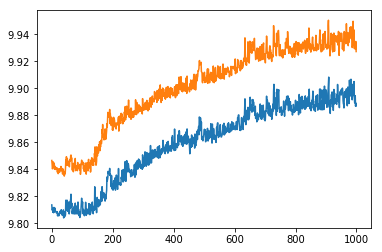

In [160]:
low,high,low_ave,high_ave=low_high1(inward)
#plot lowest and highest point of every cycle
plt.plot(low)
plt.plot(high)

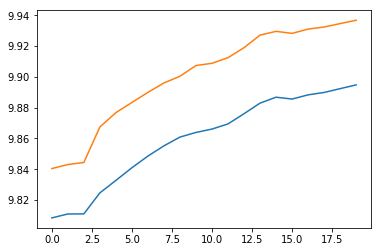

In [161]:
#plot average oflowest and highest point of every 50 cycles
plt.plot(low_ave)
plt.plot(high_ave)

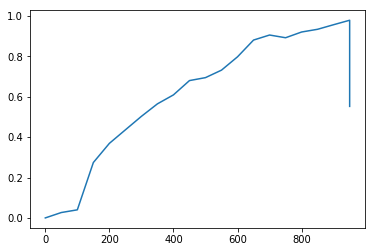

In [162]:
cycle=list(range(len(high_ave)))
cycle.append(len(high_ave)-1)
high_ave.append(low_ave[-1])
df=pd.DataFrame({'No. of cycles':cycle,'R':high_ave})
origin=df['R'][0]
df['R']=(df['R']/origin-1)*100
df['No. of cycles']*=50
plt.plot(df['No. of cycles'],df['R'])
df.to_csv('D:/2probe/clean/micro/inward_to_first_high.csv', index = False)

In [163]:
def low_high2(reverse):
    low=[]
    high=[]
    low_ave=[]
    high_ave=[]
    
    low_start=T
    high_start=T/2.0
    for i in range(P1):
        low.append(reverse.loc[(reverse['time']>low_start-(accuracy/2.0))&(reverse['time']<low_start+(accuracy/2.0)),'R'].mean())
        high.append(reverse.loc[(reverse['time']>high_start-(accuracy/2.0))&(reverse['time']<high_start+(accuracy/2.0)),'R'].mean())
        low_start+=T
        high_start+=T
        if i%50==49:
            low_ave.append(np.average(low[i-49:i+1]))
            high_ave.append(np.average(high[i-49:i+1]))
        
    return low,high,low_ave,high_ave

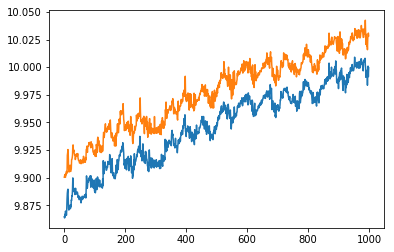

In [164]:
low,high,low_ave,high_ave=low_high2(reverse)

plt.plot(low)
plt.plot(high)

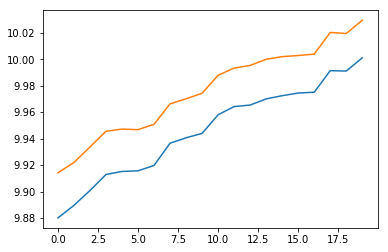

In [165]:
plt.plot(low_ave)
plt.plot(high_ave)

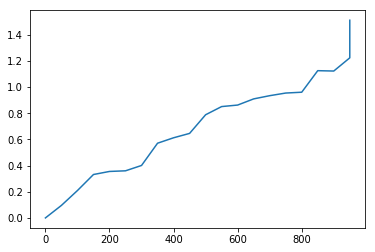

In [166]:
cycle=list(range(len(low_ave)))
cycle.append(len(low_ave)-1)
low_ave.append(high_ave[-1])
df=pd.DataFrame({'No. of cycles':cycle,'R':low_ave})
origin=df['R'][0]
df['R']=(df['R']/origin-1)*100
df['No. of cycles']*=50
plt.plot(df['No. of cycles'],df['R'])
df.to_csv('D:/2probe/clean/micro/inward_to_first_low.csv', index = False)